<a href="https://colab.research.google.com/github/yash7125/makemore/blob/main/makemore_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
names = open('names.txt', 'r').read().splitlines()
print(names[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [ ]:
chs = sorted((list(set(''.join(names)))))
print(chs)

stoi = {s:i+1 for i,s in enumerate(chs)}
stoi['.'] = 0
print(stoi)
itos = {i:s for s,i in stoi.items()}
print(itos)



['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
import torch

# creating our dataset
block_size = 3
X = []
Y = []

for name in names:

  context = [0] * block_size
  # print(name)

  for ch in name + '.':
    idx = stoi[ch]
    X.append(context)
    Y.append(idx)
    # print(''.join(itos[i] for i in context) + '-->' + itos[idx])
    context = context[1:] + [idx]
    # print(context)

  # print('\n')

X = torch.tensor(X)
Y = torch.tensor(Y)


In [ ]:
X.shape

torch.Size([228146, 3])

In [ ]:
Y.shape

torch.Size([228146])

In [ ]:
# C = torch.randn((27, 2))

In [ ]:
# emb = C[X]
# emb.shape

In [ ]:
# # W1 = torch.randn((6, 100))
# # b1 = torch.randn(100)
#     # (32, 6) * (6, 100) --> (32 * 100)
# h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
# h.shape


In [ ]:
# W2 = torch.randn((100, 27))
# b2 = torch.randn(27)

# logits = (h @ W2) + b2
# counts = logits.exp()

# probs = counts / counts.sum(1, keepdims=True)
# probs[0].sum()


In [ ]:
# loss = -probs[torch.arange(32), Y].log().mean()
# loss

In [ ]:
# making thing much more simpler and easy to read
import torch.nn.functional as F
import matplotlib.pyplot as plt

import random

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
# print(C[0])
W1 = torch.randn((30, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]


In [ ]:
# creating train, val, test set

def build_dataset(names):

  X = []
  Y = []

  block_size = 3

  for name in names:

    context = [0] * block_size
    # print(name)
    for ch in name + '.':
      idx = stoi[ch]
      X.append(context)
      Y.append(idx)
      # print(''.join(itos[i] for i in context) + '-->' + itos[idx])
      context = context[1:] + [idx]
      # print(context)

    # print('\n')

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, " ", Y.shape)
  return X, Y

n1 = int(0.8 * len(names))
n2 = int(0.9 * len(names))

random.seed(42)
random.shuffle(names)

X_train, Y_train = build_dataset(names[:n1])
val_X, val_Y =  build_dataset(names[n1 : n2])
test_X, test_Y = build_dataset(names[n2:])

torch.Size([182455, 3])   torch.Size([182455])
torch.Size([22929, 3])   torch.Size([22929])
torch.Size([22762, 3])   torch.Size([22762])


In [ ]:
sum(p.nelement() for p in parameters)


17697

In [ ]:
iterations = []
losses = []
lri = []

for p in parameters:
  p.requires_grad = True


In [ ]:
for i in range(20000):
  # mini-batches
  idx = torch.randint(0, X_train.shape[0], (32,))

  # implementing forward pass
  # (32, 3, 2)
  emb = C[X[idx]]
  # (32, 6) * (6, 100) --> (32, 100) first hidden layer
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  # second hidden layer
  logits = h @ W2 + b2
  # counts = logits.exp()
  # probs = counts / counts.sum(1, keepdims=True)
  loss = F.cross_entropy(logits, Y_train[idx])

  # print(i + 1, " ", loss.item())

  iterations.append(i + 1)
  losses.append(loss.log10().item())

  # back propagation
  for p in parameters:
    p.grad = None
  loss.backward()

  # lr = lrs[i]
  # lri.append(lre[i])

  # print(i + 1, " ", loss.item(), " ", "lr-->", lr.item())

  lr = 0.1 if i < 12000 else 0.01
  # update the parameters
  for p in (parameters):
    p.data += -lr * p.grad



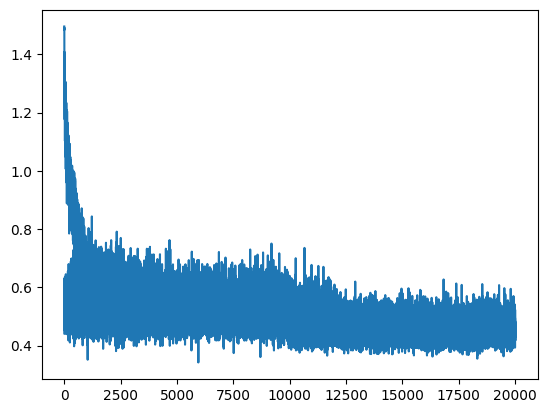

In [ ]:
plt.plot(iterations, losses)
# # mini batches are needed
# idx = torch.randint(0, X.shape[0], (32,))
# idx
# emb = C[X]
# emb.shape
# loss

In [ ]:
# train set
emb = C[X_train]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.8918, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[val_X]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, val_Y)
loss

tensor(2.8836, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[test_X]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, test_Y)
loss

tensor(2.8877, grad_fn=<NllLossBackward0>)